## Machine Learning Project - Detection of Cardiovascular diseases / CVD
## Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. 

In [1]:
# To perform various tasks, we have to import some important python libraries
# Numpy is for Numerical Python, Pandas for handling large data sets / Dataframe 
import pandas as pd
import numpy as np

# To avoid unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import libraries for model validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# import libraries for metrics and reporting
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score



## Dataset description:


### Variables with Description

1.Age      =	Age in years

2.Sex      = for sex, 1 = male & 0 = female

3.cp|	   = Chest pain type

4.trestbps = Resting blood pressure (in mm Hg on admission to the hospital)

5.chol     = Serum cholesterol in mg/dl

6.fbs      = Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7.restecg  = Resting electrocardiographic results

8.thalach  = Maximum heart rate achieved

9.exang	   = Exercise induced angina (1 = yes; 0 = no)

10.oldpeak = ST depression induced by exercise relative to rest

11.slope   = Slope of the peak exercise ST segment

12.ca      = Number of major vessels (0-3) colored by fluoroscopy

13.thal    = Thalasemia where 3 = normal; 6 = fixed defect; 7 = reversible defect

14.Target  = Chances of Heart=attack,where 1 = Probability of Heart-attack  and   0 = No Heart-attack


# 1. Preliminary analysis:

## Task-1 : Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.
## Task-2 : Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

In [2]:
# Reading the dataset
health_df = pd.read_excel("D:/DATA SCIENCE/Machine Learning/Live Class/Project 4/Health_Cardio.xlsx")
health_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
# Inspecting for the shape and total number of data / size
print("Shape of the data is := ",health_df.shape)
print("Total number of data in the dataset is := ",health_df.size)

Shape of the data is :=  (303, 14)
Total number of data in the dataset is :=  4242


### So, the dataset has 303 rows and 14 columns  with total number of datasets = 4242

In [4]:
# Checking for feature type and any null value 
health_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### So there is no Categorical object. All are in Numerical form only.

In [5]:
# Checking for any missing/null value
health_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### So, there is no Missing or Null Value in the Datasets.

In [6]:
# Checking for any duplicate value or row in the dataset

# subset specify the particular columns in which duplicate values are to be searched.
# keep is used to specify which instance of the repeated rows is to be identified as a unique row.

health_df.duplicated(subset=None, keep= 'first')

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [7]:
# This will give the number of duplicates
health_df.duplicated().sum()

1

In [8]:
# So, it seems like, there is one duplicate row and that is : 
health_df[health_df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
# So, we have to drop the duplicate row for better inspection
health_df.drop(labels=None, axis=0, index= 164, inplace=True, errors='raise')

In [10]:
health_df.duplicated().sum()

0

In [11]:
health_df.shape

(302, 14)

### So now all duplicate rows are removed and final shape reduced in 302 rows and 14 columns.

In [12]:
# Let us check whether any of the columns has any value other than numeric such as a "?" instead of a number.

health_df[~health_df.applymap(np.isreal).all(1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


### So, there is no missing or dupicate values in the dataset

# 2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:



## Task- a : Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

In [13]:
# 5-point summary
health_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


### So, the Mean value shows the central tendency and std / Standard Deviation explain the spread of data

In [14]:
health_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [15]:
# Exploring our Target column
health_df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

In [16]:
numerical_feature_columns = list(health_df._get_numeric_data()) 
numerical_feature_columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

### Here we can also see the central tendency and Data Distribution by box plots

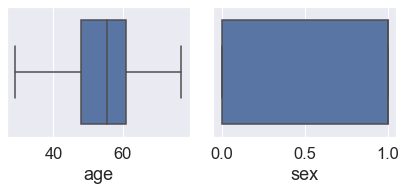

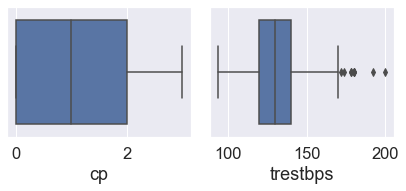

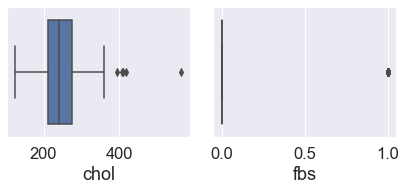

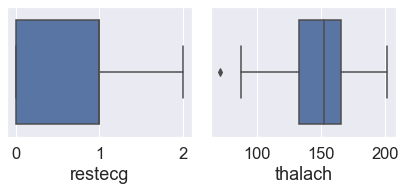

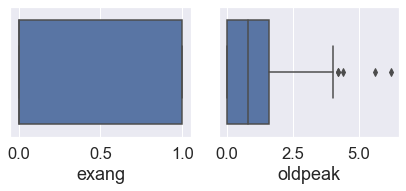

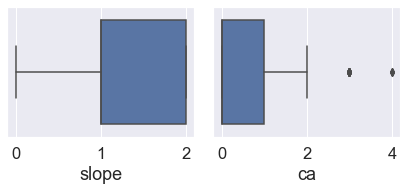

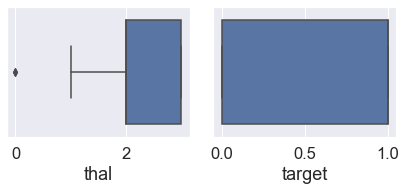

In [17]:
for i in range(0,len(numerical_feature_columns),2):
        plt.figure(figsize=(6,3))
        plt.subplot(121)
        sns.boxplot( numerical_feature_columns[i],data = health_df)
        plt.subplot(122)            
        sns.boxplot( numerical_feature_columns[i+1],data = health_df)
        plt.tight_layout()
        plt.show()

### It looks like some of the columns like "trestbps", " chol", "oldpeak" ,"thal"  have some outliers. So we have to remove those outliers for better result

In [18]:
# IQR (Interquartile range ) technique for outlier treatment
def outlier_treatment(col):
    sorted(col)
    Q1,Q3 = np.percentile(col , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [19]:
lower_range,upper_range = outlier_treatment(health_df['trestbps'])
print("Lower Range:",lower_range)
print("Upper Range:",upper_range)

Lower Range: 90.0
Upper Range: 170.0


<AxesSubplot:xlabel='trestbps'>

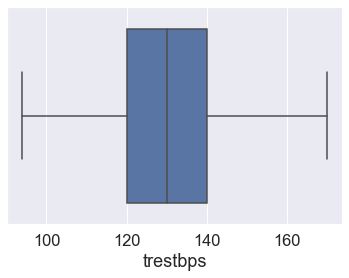

In [20]:
lower_index = list(health_df[ health_df['trestbps'] < lower_range ].index)

upper_index = list(health_df[ health_df['trestbps'] > upper_range ].index)

total_index = list(lower_index + upper_index)
health_df.drop(total_index, inplace = True)
sns.boxplot(x=health_df['trestbps'])

### We can see that all the outliers from 'trestbps' column is been removed.Similarly we will remove outliers for other columns

<AxesSubplot:xlabel='chol'>

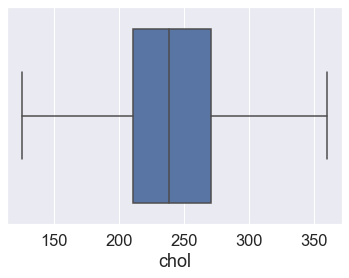

In [21]:
# Treating outliers in 'chol' column
lower_range,upper_range = outlier_treatment(health_df['chol'])
lower_index = list(health_df[ health_df['chol'] < lower_range ].index)
upper_index = list(health_df[ health_df['chol'] > upper_range ].index)
total_index = list(lower_index + upper_index)
health_df.drop(total_index, inplace = True)
sns.boxplot(x=health_df['chol'])


<AxesSubplot:xlabel='oldpeak'>

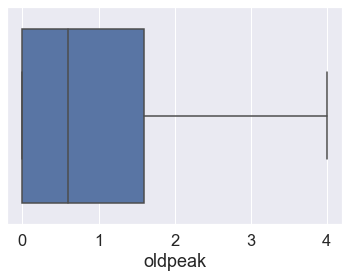

In [22]:
# Treating outliers in 'oldpeak' column
lower_range,upper_range = outlier_treatment(health_df['oldpeak'])
lower_index = list(health_df[ health_df['oldpeak'] < lower_range ].index)
upper_index = list(health_df[ health_df['oldpeak'] > upper_range ].index)
total_index = list(lower_index + upper_index)
health_df.drop(total_index, inplace = True)
sns.boxplot(x=health_df['oldpeak'])


<AxesSubplot:xlabel='thal'>

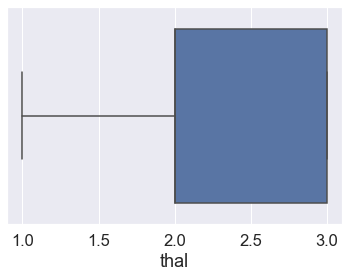

In [23]:
# Treating outliers in 'thal' column
lower_range,upper_range = outlier_treatment(health_df['thal'])
lower_index = list(health_df[ health_df['thal'] < lower_range ].index)
upper_index = list(health_df[ health_df['thal'] > upper_range ].index)
total_index = list(lower_index + upper_index)
health_df.drop(total_index, inplace = True)
sns.boxplot(x=health_df['thal'])


###  Distribution of Data in distplot

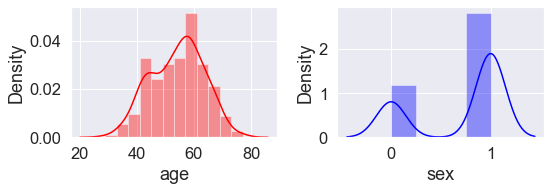

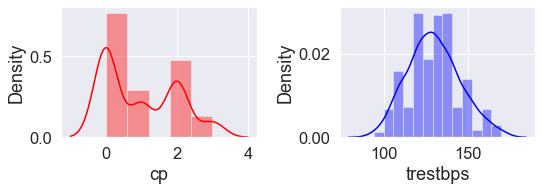

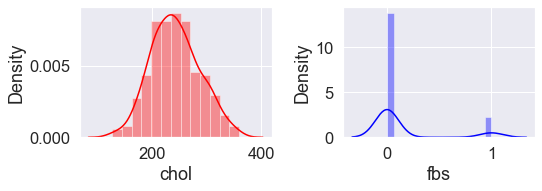

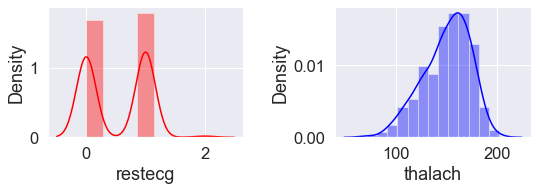

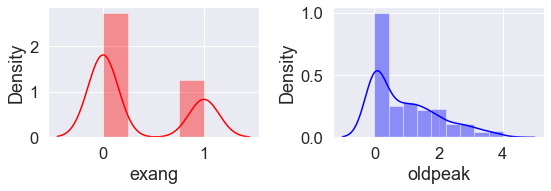

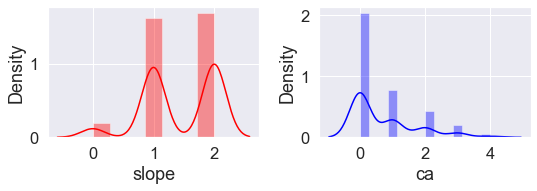

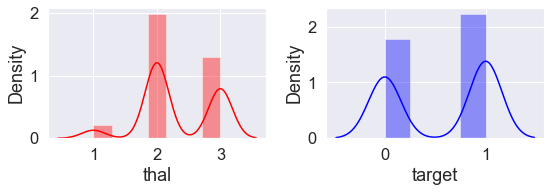

In [24]:

for i in range(0,len(numerical_feature_columns),2):
        plt.figure(figsize=(8,3))
        plt.subplot(121)
        sns.distplot(health_df[numerical_feature_columns[i]], kde=True,color = 'red')
        plt.subplot(122)            
        sns.distplot(health_df[numerical_feature_columns[i+1]], kde=True, color = 'blue') 
        plt.tight_layout()
        plt.show()

## Task- b : Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

In [25]:
health_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### So,  from the above observation there are some categorical Variable encoded in numbers. And they are "sex" , "cp" ,   " fbs" ,   "restecg" ,   " exang" ,   "slope" ,   " ca" ,   "thal"  &   "target"

<AxesSubplot:xlabel='cp', ylabel='count'>

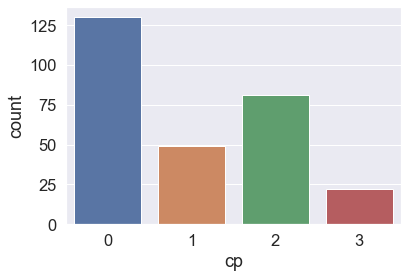

In [26]:
sns.countplot(health_df['cp'])

### So, from above observation cp / Chest pain types are given in 4 catagories and number 0 catagory is the chest pain type with most people suffering from

<AxesSubplot:xlabel='fbs', ylabel='count'>

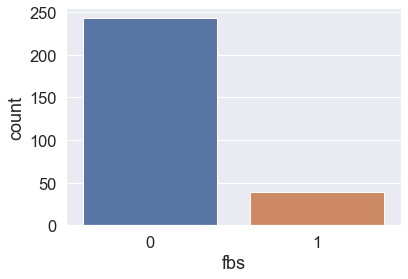

In [27]:
sns.countplot(health_df['fbs'])

### So, from above observation fbs / Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) are given. So number of high blood sugar patient is less.

<AxesSubplot:xlabel='restecg', ylabel='count'>

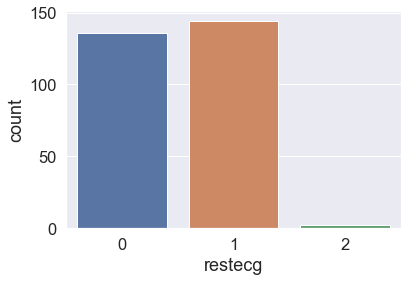

In [28]:
sns.countplot(health_df['restecg'])

### This plot shows restecg / Resting electrocardiographic results where type 1 result is more than others

<AxesSubplot:xlabel='slope', ylabel='count'>

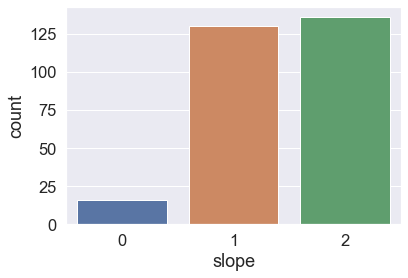

In [29]:
sns.countplot(health_df['slope'])

### This plot shows Slope of the peak exercise ST segment and count per each segment

<AxesSubplot:xlabel='exang', ylabel='count'>

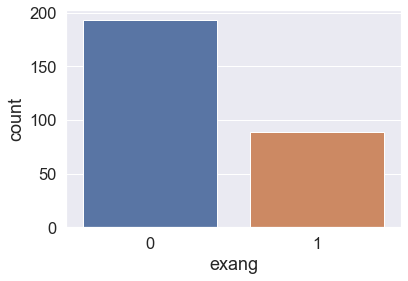

In [30]:
sns.countplot(health_df['exang'])

### This plot shows exang / Exercise induced angina (1 = yes; 0 = no). So less number of exercise induced angina

<AxesSubplot:xlabel='ca', ylabel='count'>

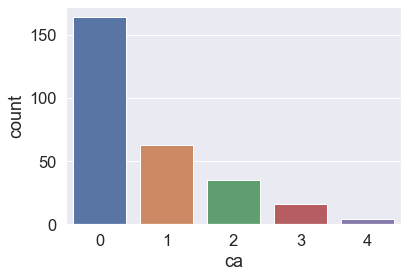

In [31]:
sns.countplot(health_df['ca'])

### This plot shows ca / Number of major vessels (0-3) colored by fluoroscopy and it shows more of 0 category

## Task- c : Study the occurrence of CVD across the Age category

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, '29'),
  Text(1, 0, '34'),
  Text(2, 0, '35'),
  Text(3, 0, '37'),
  Text(4, 0, '38'),
  Text(5, 0, '39'),
  Text(6, 0, '40'),
  Text(7, 0, '41'),
  Text(8, 0, '42'),
  Text(9, 0, '43'),
  Text(10, 0, '44'),
  Text(11, 0, '45'),
  Text(12, 0, '46'),
  Text(13, 0, '47'),
  Text(14, 0, '48'),
  Text(15, 0, '49'),
  Text(16, 0, '50'),
  Text(17, 0, '51'),
  Text(18, 0, '52'),
  Text(19, 0, '53'),
  Text(20, 0, '54'),
  Text(21, 0, '55'),
  Text(22, 0, '56'),
  Text(23, 0, '57'),
  Text(24, 0, '58'),
  Text(25, 0, '59'),
  Text(26, 0, '60'),
  Text(27, 0, '61'),
  Text(28, 0, '62'),
  Text(29, 0, '63'),
  Text(30, 0, '64'),
  Text(31, 0, '65'),
  Text(32, 0, '66'),
  Text(33, 0, '67'),
  Text(34, 0, '68'),
  Text(35, 0, '69'),
  Text(36, 0, '70'),
  Text(37, 0, '71'),
  Text(38, 0, '74'),
 

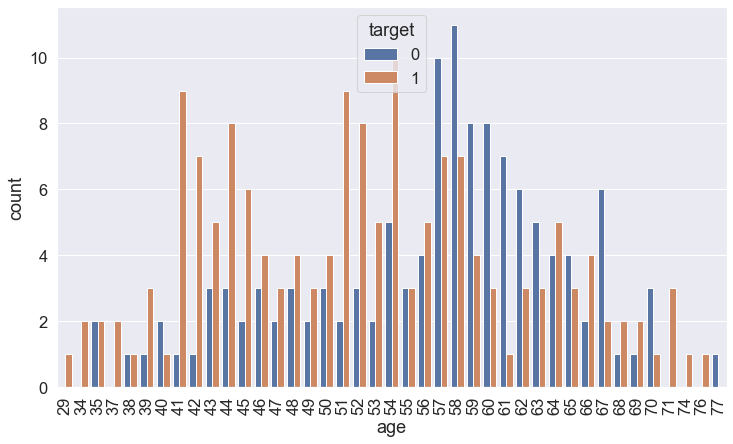

In [32]:
plt.figure(figsize=(12,7))
sns.countplot('age', data = health_df , hue = 'target')
plt.xticks(rotation = 90)

### So, from above observation cases of CVD is Highest in the age of 58. And age group under 41 to 71 is under more risk of CVD.

## Task- d : Study the composition of all patients with respect to the Sex category

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

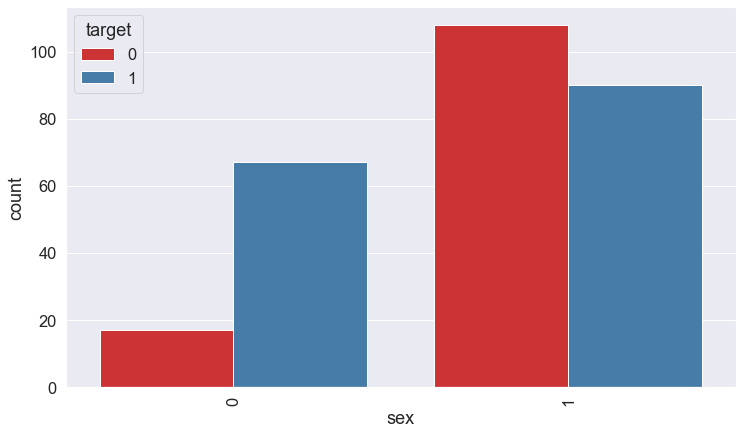

In [33]:
plt.figure(figsize=(12,7))
sns.countplot('sex', data = health_df, palette = 'Set1',hue = 'target')
plt.xticks(rotation = 90)

### So, in this count plot where 0 = female and 1 = male , it can be seen that no. of male CVD patient is  more from the number of female patient . So males are more prone to Heart-attack.

## Task- e : Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, '94'),
  Text(1, 0, '100'),
  Text(2, 0, '101'),
  Text(3, 0, '102'),
  Text(4, 0, '104'),
  Text(5, 0, '105'),
  Text(6, 0, '106'),
  Text(7, 0, '108'),
  Text(8, 0, '110'),
  Text(9, 0, '112'),
  Text(10, 0, '115'),
  Text(11, 0, '117'),
  Text(12, 0, '118'),
  Text(13, 0, '120'),
  Text(14, 0, '122'),
  Text(15, 0, '123'),
  Text(16, 0, '124'),
  Text(17, 0, '125'),
  Text(18, 0, '126'),
  Text(19, 0, '128'),
  Text(20, 0, '129'),
  Text(21, 0, '130'),
  Text(22, 0, '132'),
  Text(23, 0, '134'),
  Text(24, 0, '135'),
  Text(25, 0, '136'),
  Text(26, 0, '138'),
  Text(27, 0, '140'),
  Text(28, 0, '142'),
  Text(29, 0, '144'),
  Text(30, 0, '145'),
  Text(31, 0, '146'),
  Text(32, 0, '148'),
  Text(33, 0, '150'),
  Text(34, 0, '152'),
  Text(35, 0, '154'),
  Text(36, 0, '155'),
  T

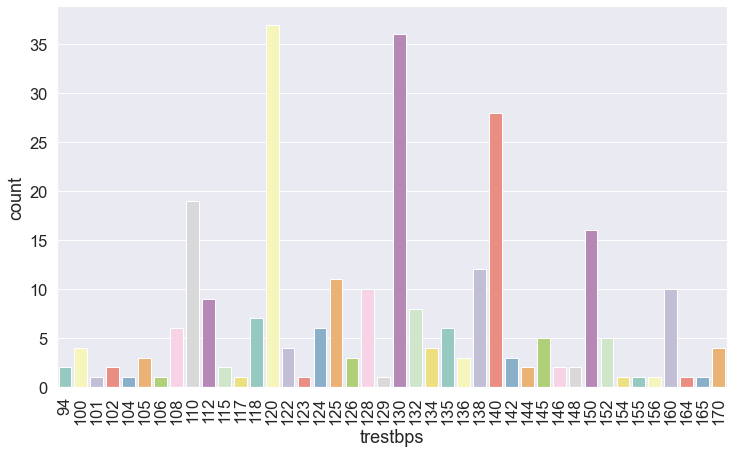

In [34]:
plt.figure(figsize=(12,7))
sns.countplot('trestbps', data = health_df, palette = 'Set3')
plt.xticks(rotation = 90)

### So, Form the above data of "trestbps" / Resting blood pressure (in mm Hg on admission to the hospital),it seems to be some higher and some lower bp than normal limit which is in between 80-120 mm hg ,such anomalies also can be the reason of heart-attacks.

## Task- f : Describe the relationship between cholesterol levels and  target variables

<AxesSubplot:xlabel='chol', ylabel='target'>

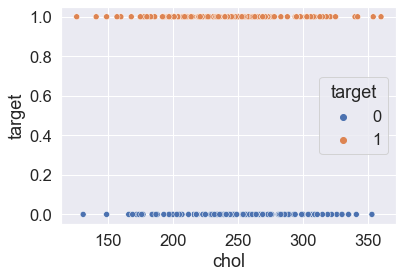

In [35]:
import seaborn as sns
sns.scatterplot(data=health_df, x="chol", y="target", hue="target", size=None ,legend='auto')

<AxesSubplot:xlabel='target', ylabel='chol'>

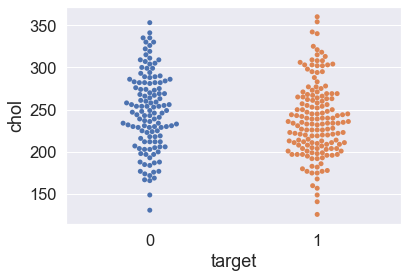

In [36]:
sns.swarmplot(x= 'target', y= 'chol', data=health_df)

### So, From above jointplot and swarmplot we can conclude that some people with low chol / Serum cholesterol label can be a CVD patient and again some people with high chol / Serum cholesterol label, not be a CVD patient.

## Task- g : State what relationship exists between peak exercising and the occurrence of a heart attack

Text(0, 0.5, 'Peak exercising')

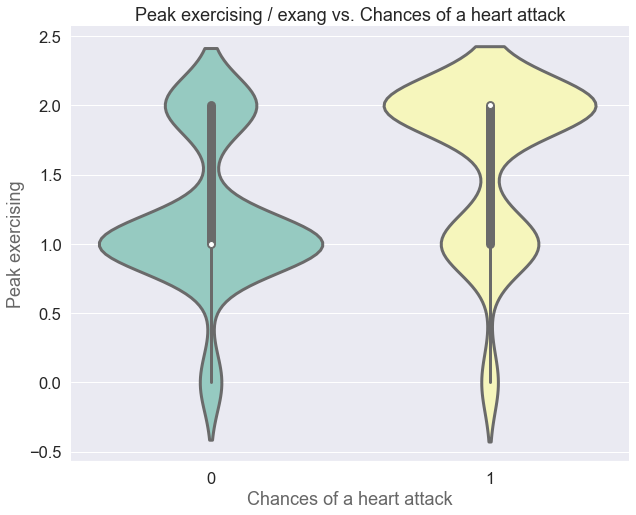

In [37]:
f, ax = plt.subplots(figsize=(10, 8))

# Show each distribution with both violins and points
sns.violinplot(x="target",y="slope",data=health_df, inner="box", palette="Set3", cut=2, linewidth=3, ax=ax)

sns.despine(left=True)

ax.set_title('Peak exercising / exang vs. Chances of a heart attack')
ax.set_xlabel("Chances of a heart attack", alpha=0.7)
ax.set_ylabel("Peak exercising", alpha=0.7)

<AxesSubplot:xlabel='target'>

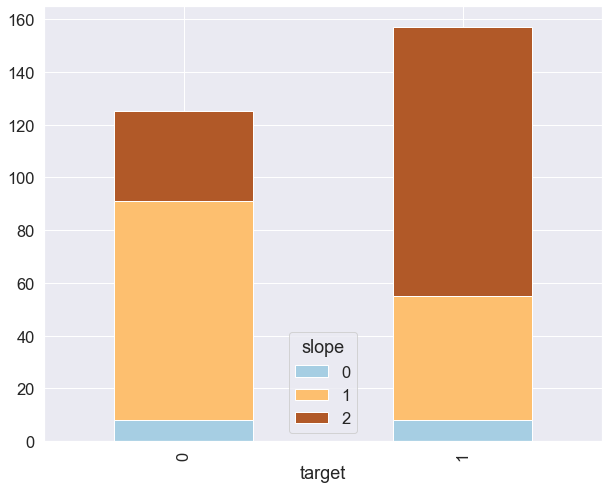

In [38]:
crosstab = pd.crosstab(index=health_df["target"], columns=health_df["slope"]) # It shoulb not be for continuous value 
crosstab.plot(kind="bar", figsize=(10,8), stacked=True, colormap='Paired')

### Analysis from above violin plot and stacked bar plot is that slope / Slope of the peak exercise ST segment is highest for category 1 slope which indicate no chances of heart attack but again high category 2 slope which indicates chances of heart attack. 

## Task-h : Check if thalassemia is a major cause of CVD

<AxesSubplot:xlabel='target'>

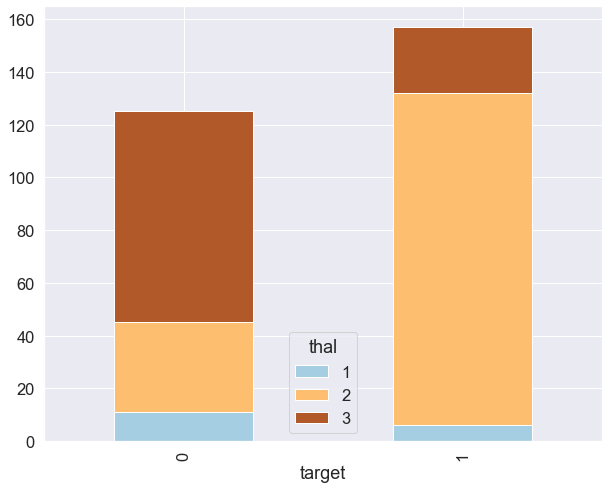

In [39]:
crosstab = pd.crosstab(index=health_df["target"], columns=health_df["thal"]) # It shoulb not be for continuous value 
crosstab.plot(kind="bar", figsize=(10,8), stacked=True, colormap='Paired')

### So, from above observation we can say that type 2 thalasemia is a major cause of CVD

## Task- i: List how the other factors determine the occurrence of CVD

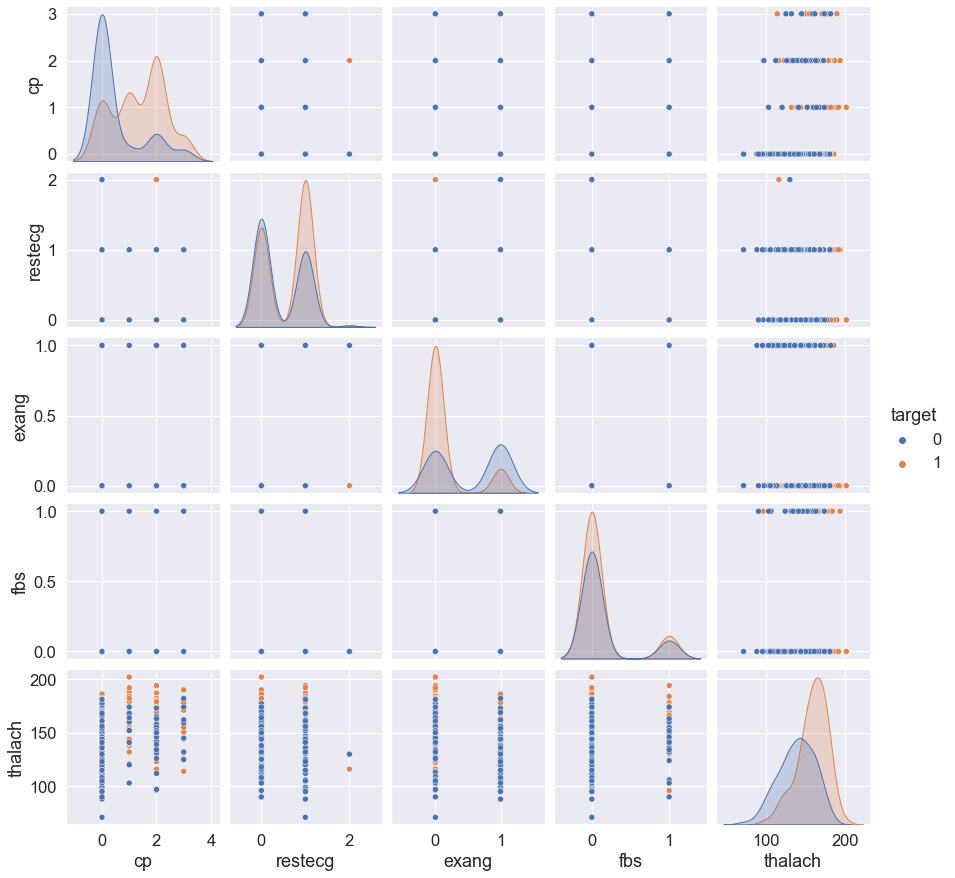

In [40]:
# Other factors like cp/ Chest pain type , restecg / Resting electrocardiographic results and slope / 
cols = [ "cp" ,  "restecg"  , "exang", "fbs" , "thalach","target" ]
sns.pairplot(health_df[cols],hue ='target')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

<AxesSubplot:xlabel='thalach', ylabel='target'>

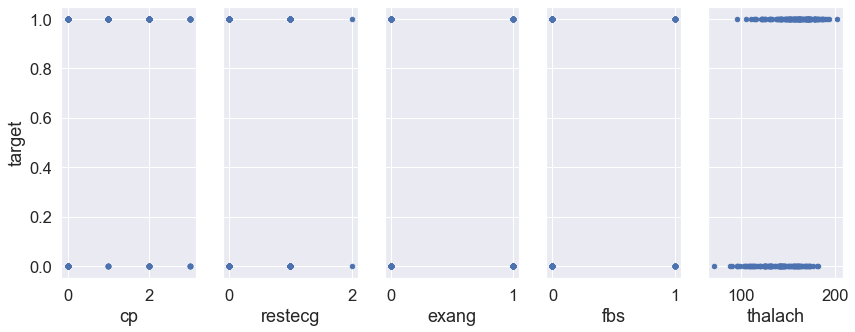

In [41]:
# visualize the relationship between the features and the target using scatterplots
fig, axs = plt.subplots(1, 5, sharey=True)
health_df.plot(kind='scatter', x='cp', y='target', ax=axs[0], figsize=(14, 5))
health_df.plot(kind='scatter', x='restecg', y='target', ax=axs[1])
health_df.plot(kind='scatter', x='exang', y='target', ax=axs[2])
health_df.plot(kind='scatter', x='fbs', y='target', ax=axs[3])
health_df.plot(kind='scatter', x='thalach', y='target', ax=axs[4])

### Above graph shows relationship between other features and target for inducing CVD

## Task- j:	Use a pair plot to understand the relationship between all the given variables

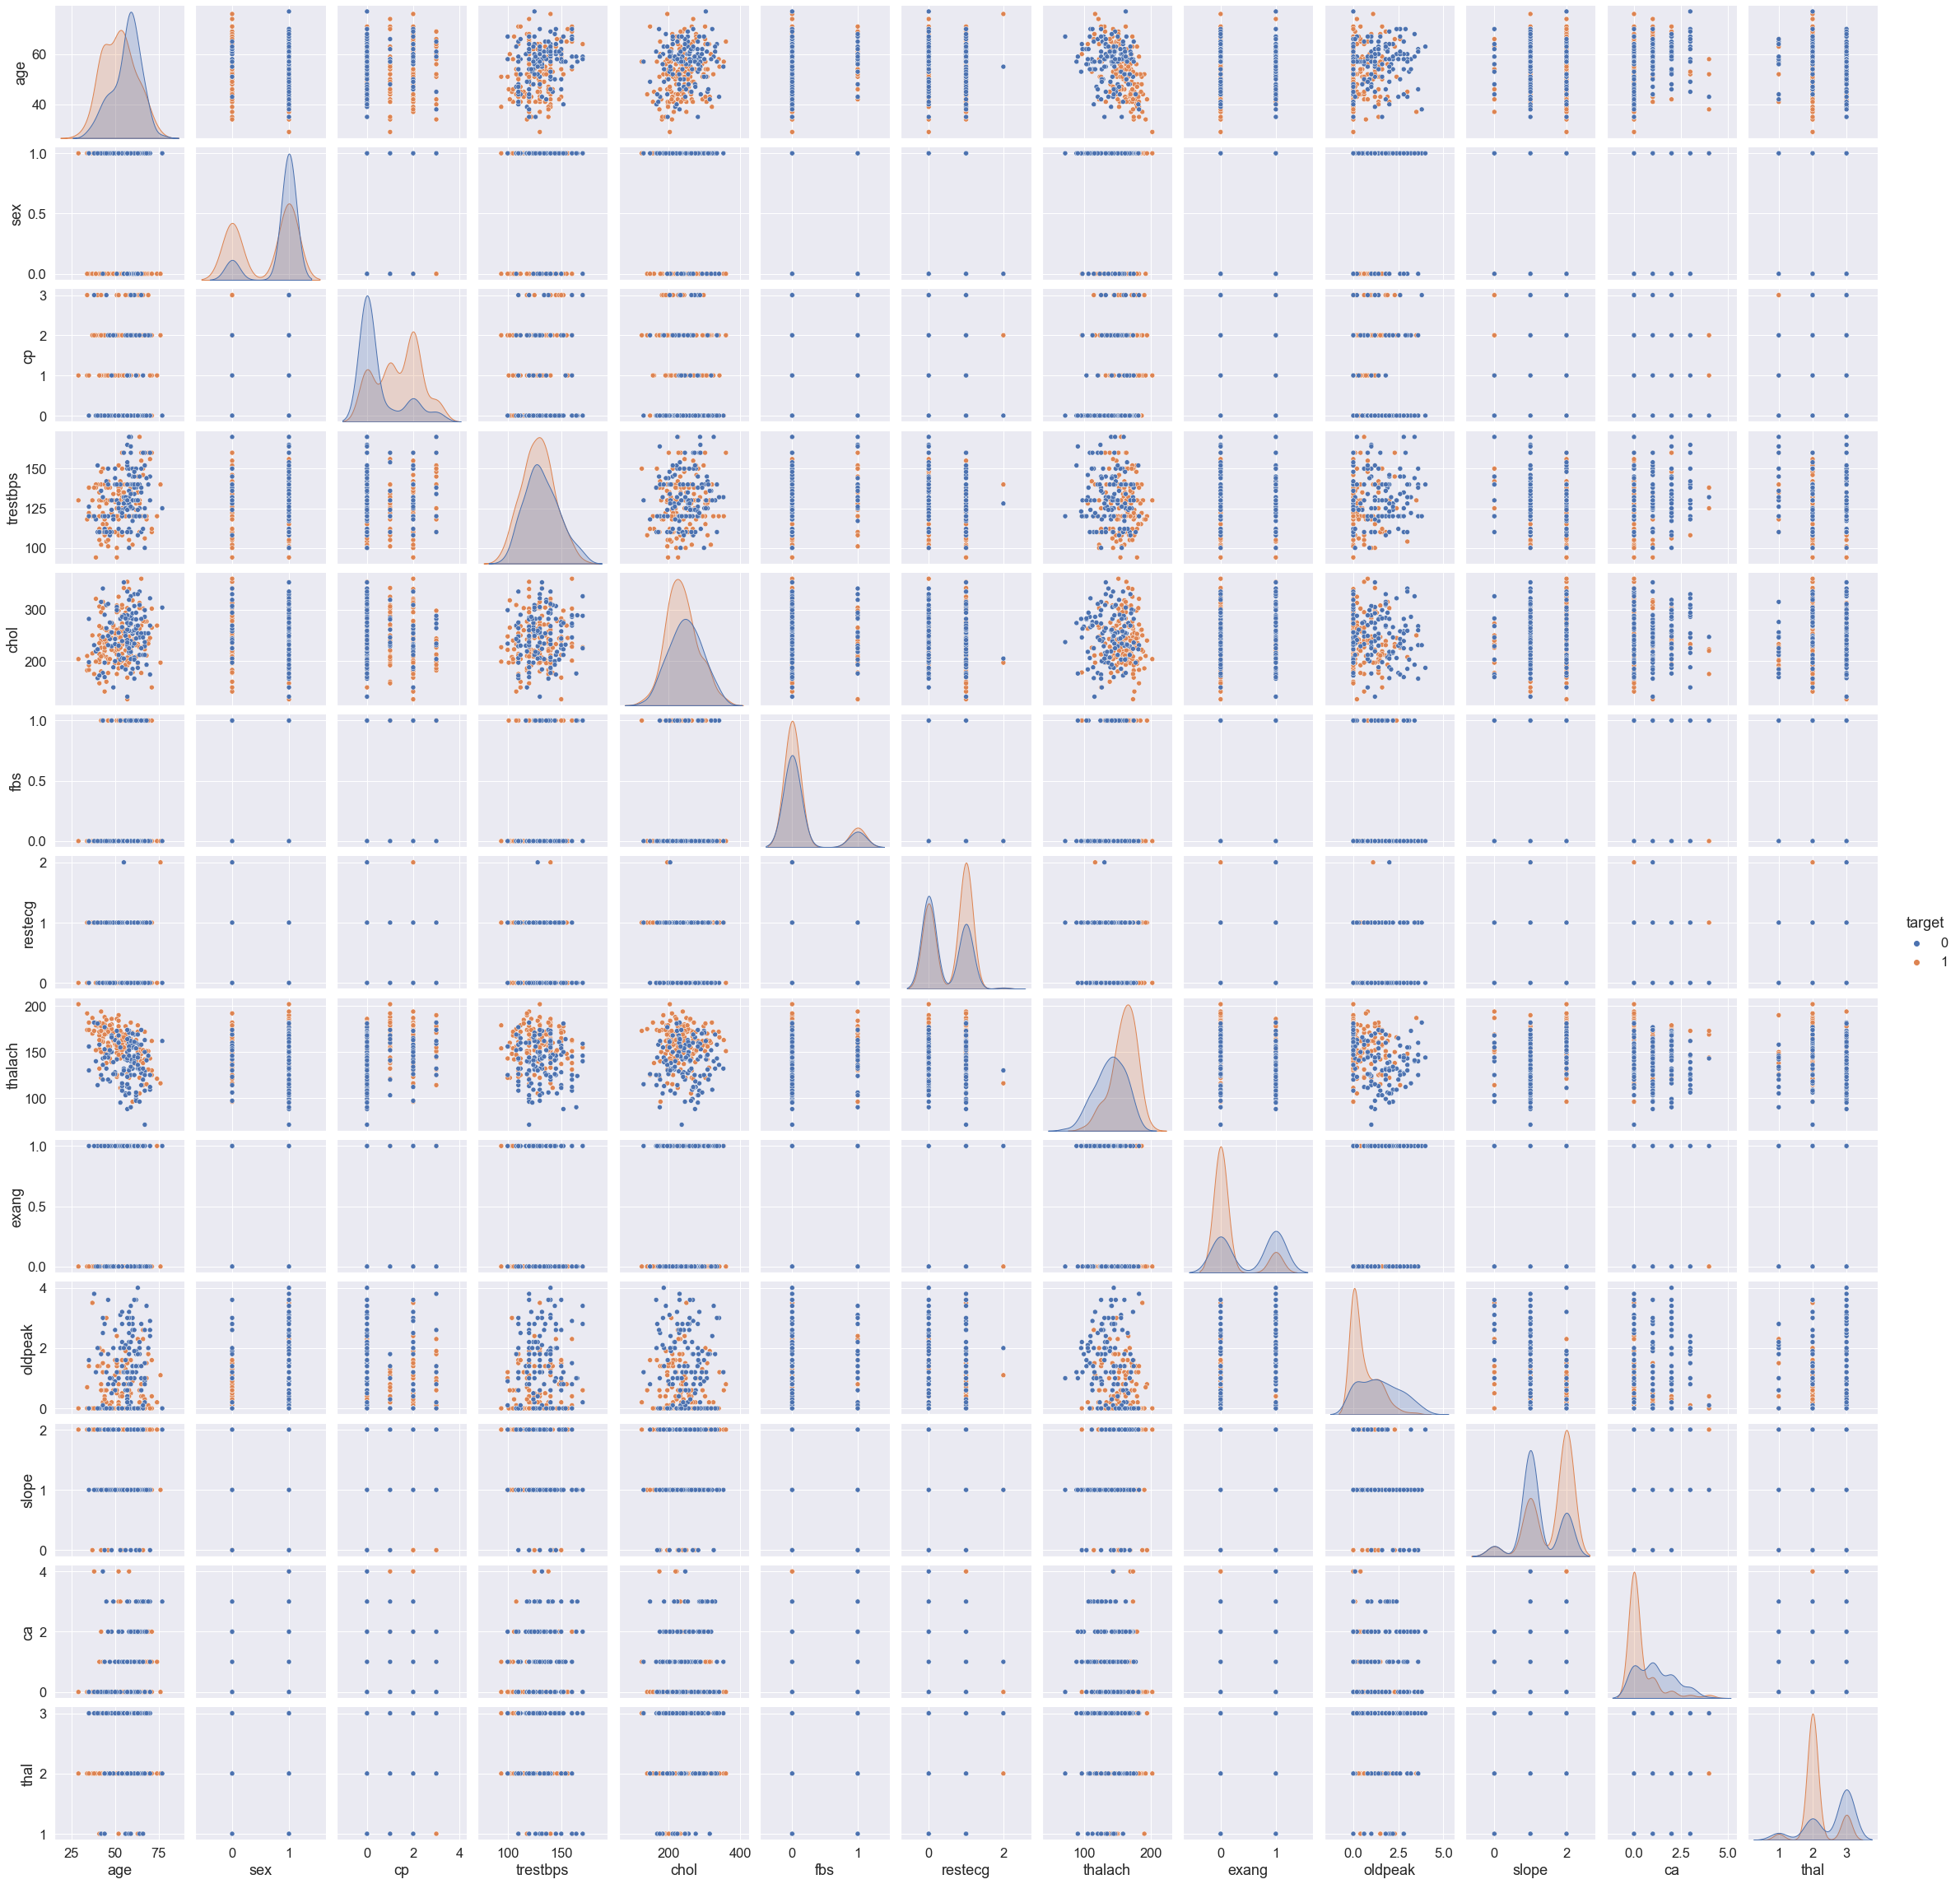

In [42]:
sns.pairplot(health_df,hue = 'target')

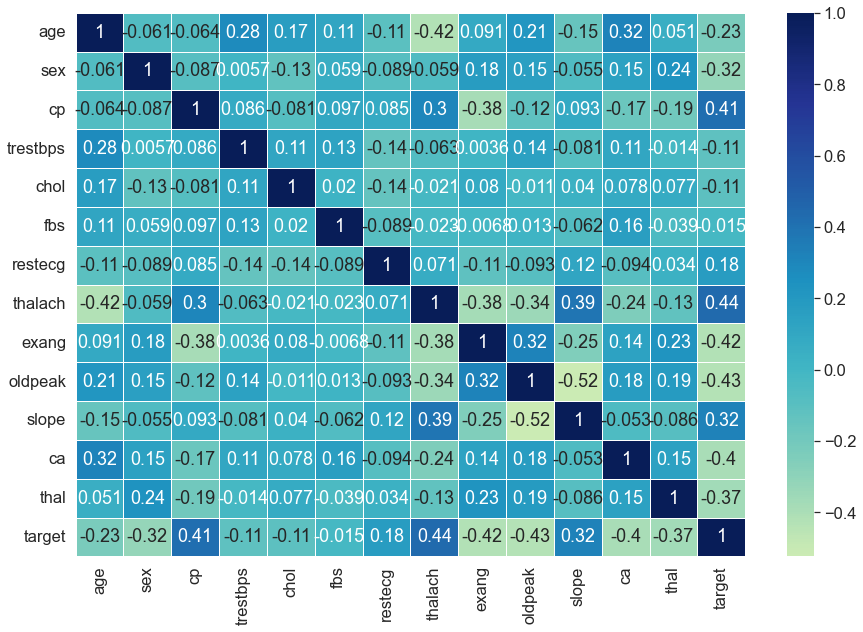

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(health_df.corr(),annot=True,linewidths=.5,center=0,cbar=True,cmap="YlGnBu")
plt.show()

### Above Correlation plot explains the effect of features on target or chances of a heart-attack.

## 3. Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection



In [44]:
# Lets divide the dataset in train and test data for model training and testing
x = health_df.drop(['target'], axis=1)
y = health_df[['target']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [45]:
print('shape of xtrain :', x_train.shape)
print('shape of ytrain :', y_train.shape)
print('shape of xtest :', x_test.shape)
print('shape of ytest :', y_test.shape)

shape of xtrain : (197, 13)
shape of ytrain : (197, 1)
shape of xtest : (85, 13)
shape of ytest : (85, 1)


In [46]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2
113,43,1,0,110,211,0,1,161,0,0.0,2,0,3
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
51,66,1,0,120,302,0,0,151,0,0.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [47]:
y_train

,target
58,1
113,1
217,0
152,1
51,1
...,...
213,0
274,0
75,1
252,0


In [48]:
# There seems to be a case of large number & small numbers - scaling / Normalization may need to be done

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

scaler = StandardScaler()
scaler.fit(health_df)
print(scaler.mean_)
scaled_df = pd.DataFrame(scaler.transform(health_df),columns = health_df.columns)
scaled_df

[5.41063830e+01 7.02127660e-01 9.82269504e-01 1.29861702e+02
 2.42524823e+02 1.38297872e-01 5.24822695e-01 1.49783688e+02
 3.15602837e-01 9.55319149e-01 1.42553191e+00 6.98581560e-01
 2.31205674e+00 5.56737589e-01]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.970972,0.651339,1.959821,0.983120,-0.213710,2.496151,-1.022271,0.009374,-0.679073,1.312104,-2.382748,-0.709510,-2.266061,0.892288
1,-1.867611,0.651339,0.988522,0.008981,0.167722,-0.400617,0.925570,1.612738,-0.679073,2.483031,-2.382748,-0.709510,-0.538955,0.892288
2,-1.430906,-1.535299,0.017222,0.008981,-0.864387,-0.400617,-1.022271,0.962725,-0.679073,0.433908,0.960212,-0.709510,-0.538955,0.892288
3,0.206738,0.651339,0.017222,-0.640445,-0.146398,-0.400617,0.925570,1.222730,-0.679073,-0.151556,0.960212,-0.709510,-0.538955,0.892288
4,0.315914,-1.535299,-0.954078,-0.640445,2.501185,-0.400617,0.925570,0.572718,1.472596,-0.346711,0.960212,-0.709510,-0.538955,0.892288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0.315914,-1.535299,-0.954078,0.658407,-0.034213,-0.400617,0.925570,-1.160649,1.472596,-0.737020,-0.711268,-0.709510,1.188151,-1.120714
278,-0.994201,0.651339,1.959821,-1.289871,0.481842,-0.400617,0.925570,-0.770641,-0.679073,0.238753,-0.711268,-0.709510,1.188151,-1.120714
279,1.516853,0.651339,-0.954078,0.918178,-1.111196,2.496151,0.925570,-0.380634,-0.679073,2.385454,-0.711268,1.321778,1.188151,-1.120714
280,0.315914,0.651339,-0.954078,0.008981,-2.502299,-0.400617,0.925570,-1.507322,1.472596,0.238753,-0.711268,0.306134,1.188151,-1.120714


<AxesSubplot:>

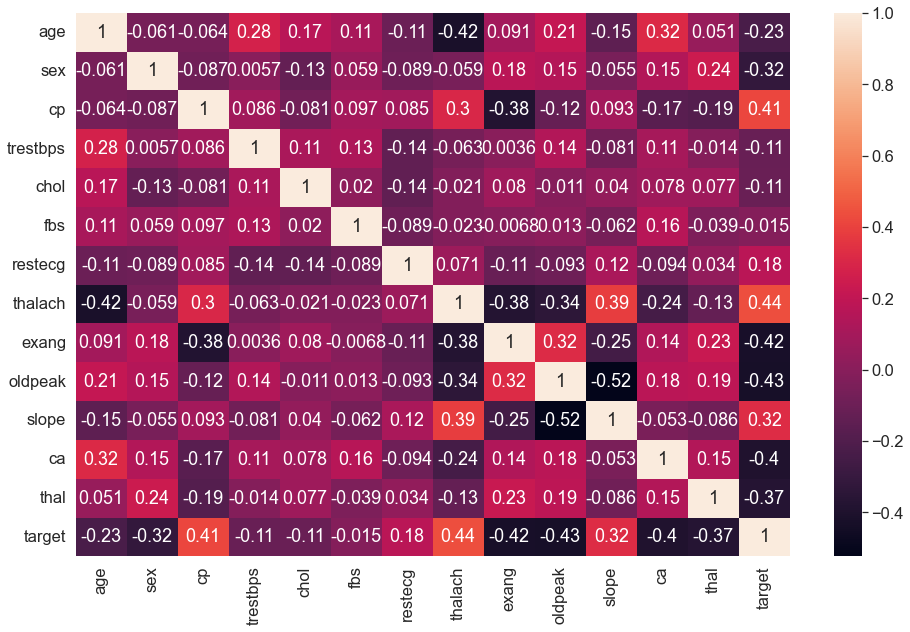

In [49]:
# Corelation analysis
plt.figure(figsize=(16, 10))
sns.heatmap(scaled_df.corr(), annot=True)

### From above correlation graph we can easily see the relations between Causes of heart-attack to the result/target.

In [50]:
# scale the train and test data differently to prevent data leaking

x_train_scaled = preprocessing.scale(x_train)
x_test_scaled = preprocessing.scale(x_test)


In [51]:
# Calculate the p-value of logistic regression from statsmodel for feature selection
# Logistic regression pvalue is used to test the null hypothesis and its coefficient is equal to zero. 
#The lowest pvalue is <0.05 and this lowest value indicates that you can reject the null hypothesis which is good for model.

from scipy.stats import norm
def logit_pvalue(model, x_test_scaled):
   
    p = model.predict_proba(x)
    n1 = len(p)
    m1 = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    answ = np.zeros((m1, m1))
    for i in range(n1):
        answ = answ + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(answ))
    se = np.sqrt(np.diag(vcov))
    t1 =  coefs/se  
    p = (1 - norm.cdf(abs(t1))) * 2
    return p



#print(logit_pvalue(model, x_train_scaled))

import statsmodels.api as sd
sd_model = sd.Logit(y_train, sd.add_constant(x_train_scaled)).fit(disp=0)
print(sd_model.pvalues)
sd_model.summary()

const    0.088885
x1       0.758018
x2       0.001390
x3       0.000277
x4       0.171336
x5       0.012381
x6       0.800603
x7       0.202398
x8       0.035199
x9       0.044224
x10      0.012769
x11      0.072902
x12      0.007206
x13      0.001660
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  197
Model:                          Logit   Df Residuals:                      183
Method:                           MLE   Df Model:                           13
Date:                Fri, 16 Sep 2022   Pseudo R-squ.:                  0.5608
Time:                        02:37:39   Log-Likelihood:                -59.154
converged:                       True   LL-Null:                       -134.69
Covariance Type:            nonrobust   LLR p-value:                 1.249e-25
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4280      0.252      1.701      0.089      -0.065       0.921
x1            -0.0881      0.286     -0.308      0.758      -0.648       0.472
x2            -1.0035      0.314     -3.197      0.001      -1.619      -0.388
x3             0.9542      0.262      3.636      0.000       0.440       1.469
x4            -0.3386      0.248     -1.368      0.171      -0.824       0.147
x5            -0.7341      0.294     -2.501      0.012      -1.309      -0.159
x6             0.0697      0.276      0.253      0.801      -0.471       0.611
x7             0.3199      0.251      1.275      0.202      -0.172       0.812
x8             0.6572      0.312      2.106      0.035       0.046       1.269
x9            -0.5193      0.258     -2.012      0.044      -1.025      -0.013
x10           -0.7259      0.292     -2.490      0.013      -1.297      -0.155
x11            0.5271      0.294      1.793      0.073      -0.049       1.103
x12           -0.7728      0.288     -2.687      0.007      -1.336      -0.209
x13           -0.7329      0.233     -3.145      0.002      -1.190      -0.276
==============================================================================
"""

### So, from above observation we can see that p-value is less than 0.05 so we can reject the null-hypothesis.

### @@@ Creating a LogisticRegression model to predict Heart_attack  

In [74]:
# Fit/Train the model with scaled data
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

# Predicting result from the model 
y_predict = model.predict(x_test_scaled)
train_model_score = model.score(x_train_scaled, y_train)
test_model_score = model.score(x_test_scaled, y_test)
print("LogisticRegression Model Efficiency Percentage in training data = ",train_model_score.mean()*100)
print("LogisticRegression Model Efficiency Percentage in testing data = ",test_model_score.mean()*100)

LogisticRegression Model Efficiency Percentage in training data =  87.30964467005076
LogisticRegression Model Efficiency Percentage in testing data =  80.0


### So,the LogisticRegression Model will predict heart-attack with 80% accuracy.

### Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.model_selection import KFold

# Cross Validation with K-fold
kfold = model_selection.KFold(n_splits=10, random_state=7,shuffle=True)
results = model_selection.cross_val_score(model, x, y, cv=kfold)
print("Cross validation score of LogisticRegression Model with K-fold : " ,results.mean()*100)

Cross validation score of LogisticRegression Model with K-fold :  84.064039408867


### When Cross Validated with k-fold the LogisticRegression Model shows 84% efficiency for an unseen data. 

In [54]:
#Print the Intercept and Co-efficients of the model

print("The value of intercept for Logistic Regression Model is := \n",model.intercept_)
print("The values of co-eficient for Logistic Regression Model are:= \n",model.coef_)

The value of intercept for Logistic Regression Model is := 
 [0.40905091]
The values of co-eficient for Logistic Regression Model are:= 
 [[-0.09852822 -0.8703213   0.85673575 -0.28858739 -0.62654598  0.05996496
   0.29284549  0.59705298 -0.49462156 -0.67066822  0.47260765 -0.70528658
  -0.66970959]]


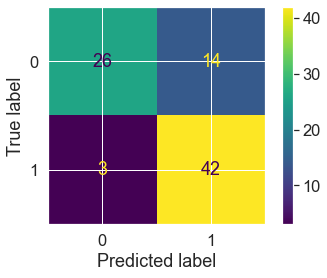

In [55]:
# calculate Confusion Matrix
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Analyzing the confusion matrix

True Positives (TP):  The model correctly predicted about  CVD for 42 person

True Negatives (TN):  The model correctly predicted about NO CVD for 26 person

False Positives (FP): The model incorrectly predicted that people do have CVD (a "Type I error") for 14 person

False Negatives (FN): The model incorrectly predicted that people don't have CVD (a "Type II error") for 3 person


### To assess how well a logistic regression model fits a dataset, we can look at the following two metrics:

Sensitivity: The probability that the model predicts a positive outcome for an observation when indeed the outcome is positive. This is also called the “true positive rate.”

Specificity: The probability that the model predicts a negative outcome for an observation when indeed the outcome is negative. This is also called the “true negative rate.”

#### One way to visualize these two metrics is by creating a ROC curve, which stands for “receiver operating characteristic” curve.

    This is a plot that displays the sensitivity along the y-axis and (1 – specificity) along the x-axis.

#### One way to quantify how well the logistic regression model does at classifying data is to calculate AUC, which stands for “area under curve.”

    The closer the AUC is to 1, the better the model.


Score of Area under Curve / AUC Score for the model is:=  0.7916666666666667




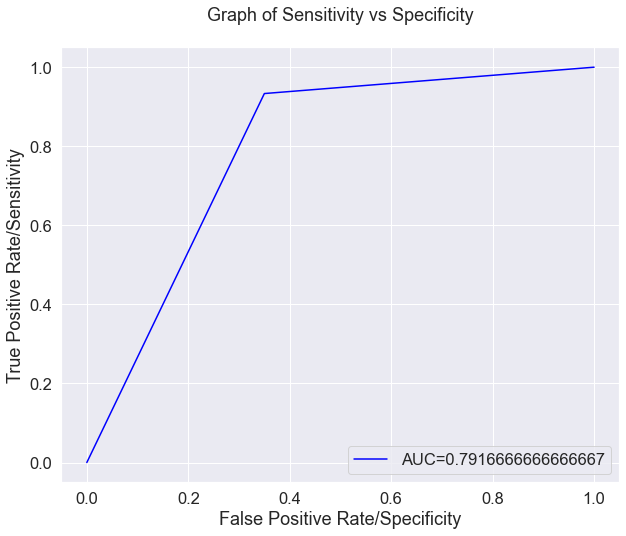

In [56]:
#calculate ROC and AUC of model
fpr, tpr, _ = metrics.roc_curve(y_test,  y_predict)
auc = metrics.roc_auc_score(y_test, y_predict)

#print AUC score
print("\nScore of Area under Curve / AUC Score for the model is:= ",auc)
print("\n")

#create ROC curve
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,label="AUC="+str(auc),color="blue")
plt.ylabel('True Positive Rate/Sensitivity')
plt.xlabel('False Positive Rate/Specificity')
plt.title("Graph of Sensitivity vs Specificity\n")
plt.legend(loc=4)
plt.show()

### As we know that the closer the AUC is to 1, the better the model. Here AUC is around 0.79 for the model so we can interprete the model as good but not the best to predict CVD.

### The more that the ROC curve hugs the top left corner of the plot, the better the model does at predicting the chances of Heart-attack .So here we can say that the model is good in predictions.

In [57]:
# It will give prabable predictions
print(model.predict_proba(x_test_scaled))

[[8.33869983e-02 9.16613002e-01]
 [2.09944057e-01 7.90055943e-01]
 [1.43597366e-02 9.85640263e-01]
 [1.59881517e-02 9.84011848e-01]
 [3.66655259e-01 6.33344741e-01]
 [9.88394843e-01 1.16051570e-02]
 [1.59512318e-01 8.40487682e-01]
 [9.81436370e-01 1.85636297e-02]
 [8.97391720e-02 9.10260828e-01]
 [3.24898417e-01 6.75101583e-01]
 [3.88454594e-01 6.11545406e-01]
 [9.95946955e-01 4.05304487e-03]
 [8.94701521e-03 9.91052985e-01]
 [1.13757502e-01 8.86242498e-01]
 [7.05805590e-02 9.29419441e-01]
 [9.94500225e-02 9.00549978e-01]
 [2.87106324e-01 7.12893676e-01]
 [2.46707335e-01 7.53292665e-01]
 [3.98804312e-02 9.60119569e-01]
 [9.77174192e-01 2.28258078e-02]
 [9.57758336e-02 9.04224166e-01]
 [2.14358884e-01 7.85641116e-01]
 [9.76629904e-01 2.33700958e-02]
 [1.26732658e-01 8.73267342e-01]
 [2.86267415e-01 7.13732585e-01]
 [2.22068057e-02 9.77793194e-01]
 [9.99249628e-01 7.50371786e-04]
 [9.35624120e-01 6.43758795e-02]
 [9.94450057e-01 5.54994331e-03]
 [9.93124413e-01 6.87558706e-03]
 [2.678621

In [58]:
# It will give summary of all scores for model efficiency
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.65      0.75        40
           1       0.75      0.93      0.83        45

    accuracy                           0.80        85
   macro avg       0.82      0.79      0.79        85
weighted avg       0.82      0.80      0.79        85



In [59]:
print("Percentage of Model precision : ",precision_score(y_test,y_predict).mean()*100) 
print("Recall Score of the model : ",recall_score(y_test,y_predict).mean()*100)
print("f1 Score of the model : ",f1_score(y_test,y_predict).mean()*100)

Percentage of Model precision :  75.0
Recall Score of the model :  93.33333333333333
f1 Score of the model :  83.16831683168317


In [60]:
# # Calculating the Standard-errors for logistic regression / Cross Validation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

print("mean_absolute_error value for this model is = ",mean_absolute_error(y_test, y_predict))
print("mean_squared_error value for this model is = ",mean_squared_error(y_test, y_predict))
print("mean_squared_log_error value for this model is = ",mean_squared_log_error(y_test, y_predict))

mean_absolute_error value for this model is =  0.2
mean_squared_error value for this model is =  0.2
mean_squared_log_error value for this model is =  0.09609060278364027




### @@@ Creating a model to predict Heart_attack with Random Forest Classifier

#### Random Forest : Its an ensemble technique where only Decision Trees are used as models & here Randomness can be introduced (by bootstraping or creating random data from original for Bagging) in each DTree model.

In [61]:
# Hyper-parameter tuning by GridSearchCV to get the best hyper-parametrs for RandomForestClassifier

from sklearn.model_selection import GridSearchCV

parameters = {'bootstrap': [True],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8],
 'n_estimators': [100]}


clf = GridSearchCV(RandomForestClassifier(), parameters, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(x_train_scaled, y_train)

clf.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 8,
 'n_estimators': 100}

In [73]:
# Here we will use the hyper-parametrs found from above
rfcl = RandomForestClassifier(bootstrap=True,max_depth= 20,max_features='auto',min_samples_leaf= 4,n_estimators=100)
rfcl = rfcl.fit(x_train_scaled, y_train)
pred_RF = rfcl.predict(x_test_scaled)
acc_RF = accuracy_score(y_test, pred_RF)
print("Random Forest Model Efficiency Percentage is = ",acc_RF.mean()*100)

Random Forest Model Efficiency Percentage is =  82.35294117647058


### So,the Random Forest Model will predict heart-attack with 82% accuracy.

In [63]:
print(classification_report(y_test, pred_RF))

              precision    recall  f1-score   support

           0       0.96      0.62      0.76        40
           1       0.75      0.98      0.85        45

    accuracy                           0.81        85
   macro avg       0.85      0.80      0.80        85
weighted avg       0.85      0.81      0.80        85



In [64]:
print("Percentage of Model precision : ",precision_score(y_test,pred_RF).mean()*100) 
print("Recall Score of the model : ",recall_score(y_test,pred_RF).mean()*100)
print("f1 Score of the model : ",f1_score(y_test,pred_RF).mean()*100)

Percentage of Model precision :  74.57627118644068
Recall Score of the model :  97.77777777777777
f1 Score of the model :  84.61538461538463



### K-fold Cross Validation to check the model efficiency

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.model_selection import KFold

accuracy = cross_val_score(rfcl, x, y, scoring='accuracy', cv = 10).mean() * 100
print("10-fold Cross validation score of Random Forests is: " , accuracy)

10-fold Cross validation score of Random Forests is:  84.38423645320198


### When Cross Validated the Random Forests Model with 10-fold cross validation,it shows 84% efficiency for an unseen data. 

In [66]:
kf = KFold(n_splits = 5, shuffle=True)
print("Train Set          Test Set        ")
for train_set,test_set in kf.split(x):
    print(train_set, test_set)

Train Set          Test Set        
[  0   2   4   5   6   7   9  10  11  12  13  14  15  16  17  18  19  20
  21  22  24  25  26  27  29  31  32  34  35  36  37  38  39  40  41  42
  43  44  45  47  49  50  52  53  54  55  56  58  59  60  61  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  79  80  81  83  84  86
  87  88  89  90  91  92  93  94  95  98  99 102 103 105 106 107 108 109
 112 113 114 115 116 118 120 121 123 125 126 127 128 129 130 131 132 133
 134 136 138 139 141 142 143 144 145 146 147 148 149 150 152 153 154 155
 156 157 158 159 160 161 162 163 164 166 167 168 170 171 172 173 174 177
 178 181 182 183 184 185 186 187 188 189 190 192 193 195 196 199 200 202
 204 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 225 226 227 228 229 230 231 232 233 234 235 237 238 241 242 243 244 245
 246 247 248 251 252 253 254 255 256 257 258 259 260 262 263 265 267 268
 269 270 272 273 274 278 279 280 281] [  1   3   8  23  28  30  33  46  48  51  57  62  

In [67]:
kf = KFold(n_splits = 10, shuffle=True)
 
print("Train Set          Test Set        ")
 
for train_set,test_set in kf.split(y):
    print(train_set, test_set)

Train Set          Test Set        
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  17  18
  19  20  21  22  23  24  25  26  28  29  30  33  34  35  36  37  39  40
  43  44  45  46  47  48  49  50  51  52  53  55  56  57  58  59  60  61
  62  63  64  65  66  67  68  71  72  73  74  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 139
 140 141 142 143 144 145 146 147 148 149 151 152 153 154 155 156 157 158
 159 161 162 163 165 166 168 169 170 172 173 174 175 176 177 179 180 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 206 207 208 209 210 211 212 214 215 216 217 218 219 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 241 242 243 244 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 26

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf_class = RandomForestClassifier(bootstrap=True,max_depth= 30,max_features='sqrt',min_samples_leaf= 4,n_estimators=100)
kfold = model_selection.KFold(n_splits=10, random_state=7,shuffle=True)
results = model_selection.cross_val_score(rf_class, x, y, cv=kfold)
print("Cross validation score of Random Forests with K-fold : " ,results.mean()*100)


Cross validation score of Random Forests with K-fold :  83.33743842364531


### When Cross Validated with k-fold the Random Forests Model shows 83% efficiency for an unseen data. 

### Cheking Efficiency by AdaBoostClassifier & XGBClassifier with K-fold cross validation 

In [71]:
from sklearn.ensemble import AdaBoostClassifier

kfold = model_selection.KFold(n_splits=10, random_state=9,shuffle=True)
model = AdaBoostClassifier(n_estimators=100, random_state=10)
results = model_selection.cross_val_score(rf_class, x, y, cv=kfold)
print("Cross validation score of AdaBoostClassifier with K-fold : " ,results.mean()*100)

Cross validation score of AdaBoostClassifier with K-fold :  82.58620689655173


### When Cross Validated with k-fold the AdaBoostClassifier Model shows 82% efficiency for an unseen data. 

In [70]:
from xgboost import XGBClassifier

clf = XGBClassifier()
kfold = model_selection.KFold(n_splits=10)
model = XGBClassifier(n_estimators=100, random_state=20)
results = model_selection.cross_val_score(model, x, y, cv=kfold)
print("Cross validation score of XGBClassifier with K-fold : " ,results.mean()*100)

Cross validation score of XGBClassifier with K-fold :  75.1231527093596


### When Cross Validated with k-fold the XGBClassifier  Model shows 75% efficiency for an unseen data. 


## FInal Conclusion:

### @@ Till now,we have computed two models -
### 1. Logistic Regression which has efficiency of 80% and
### 2. Random Forest Classifier which has efficiency of 82%. 

### >>> So the most efficient model is Random Forest Classifier which can predict the risk of Heart-attack efficiently.

### ## We have also Calculated Heart-attack prediction Efficiency by-
### 3. AdaBoostClassifier with K-fold cross validation , which has efficiency of 82%
### 4. XGBClassifier  with K-fold cross validation , which has efficiency of 75%